In [74]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway, kruskal
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
# Load datasets
metadata_df = pd.read_csv('metadata.csv')

cluster = pd.read_csv('cluster_assignments.csv')

cluster.rename(columns={'Protein_ID': 'Patient_ID'}, inplace=True)

cluster_combined = pd.merge(metadata_df, cluster, on='Patient_ID', how='left')
cluster_combined = cluster_combined[cluster_combined['Cluster'] != 2]

In [78]:
cluster_combined.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Histological_Grade,Lymph_Node_Involvement,Metastasis,Treatment,Response_to_Treatment,Follow_up_Duration_months,Survival_Status,Family_History_of_Cancer,Ethnicity,Cluster
1,BC.2,54,Male,Yes,34,Intermediate,No,No,Combination,Complete Remission,40,Survived,Yes,Hispanic,1
2,BC.3,53,Male,Yes,39,Intermediate,Yes,No,Chemotherapy,Complete Remission,19,Survived,No,African-American,3
3,BC.4,42,Male,No,31,Low,No,No,Radiation,Complete Remission,42,Survived,Yes,Other,3
4,BC.5,81,Male,Yes,34,Intermediate,Yes,No,Surgery,Complete Remission,60,Survived,No,Caucasian,0
5,BC.6,82,Female,Yes,32,Intermediate,No,No,Surgery,Complete Remission,55,Survived,Yes,Caucasian,0


In [79]:
def chi_square_test(data, variable):
    contingency_table = pd.crosstab(data['Cluster'], data[variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable}: p-value = {p}")

def anova_test(data, variable):
    clusters = data['Cluster'].unique()
    groups = [data[data['Cluster'] == cluster][variable] for cluster in clusters]
    f, p = f_oneway(*groups)
    print(f"ANOVA for {variable}: p-value = {p}")


categorical_vars = ['Gender', 'Smoking_History', 'Histological_Grade', 'Lymph_Node_Involvement', 'Metastasis', 'Treatment', 'Response_to_Treatment', 'Survival_Status', 'Family_History_of_Cancer', 'Ethnicity']

for var in categorical_vars:
    chi_square_test(cluster_combined, var)


continuous_vars = ['Age', 'Tumor_Size_mm', 'Follow_up_Duration_months']
for var in continuous_vars:
    anova_test(cluster_combined, var)


Chi-square test for Gender: p-value = 0.41341147383991594
Chi-square test for Smoking_History: p-value = 0.7536063448429918
Chi-square test for Histological_Grade: p-value = 0.00012865906652206129
Chi-square test for Lymph_Node_Involvement: p-value = 0.16518473374871412
Chi-square test for Metastasis: p-value = 0.05352783575872896
Chi-square test for Treatment: p-value = 0.47767456864739577
Chi-square test for Response_to_Treatment: p-value = 2.1481378017899058e-10
Chi-square test for Survival_Status: p-value = 1.1823907852803986e-05
Chi-square test for Family_History_of_Cancer: p-value = 0.7609845976395342
Chi-square test for Ethnicity: p-value = 0.26465618312646916
ANOVA for Age: p-value = 0.12302026762176305
ANOVA for Tumor_Size_mm: p-value = 0.0008596766864938803
ANOVA for Follow_up_Duration_months: p-value = 0.035341601406097795


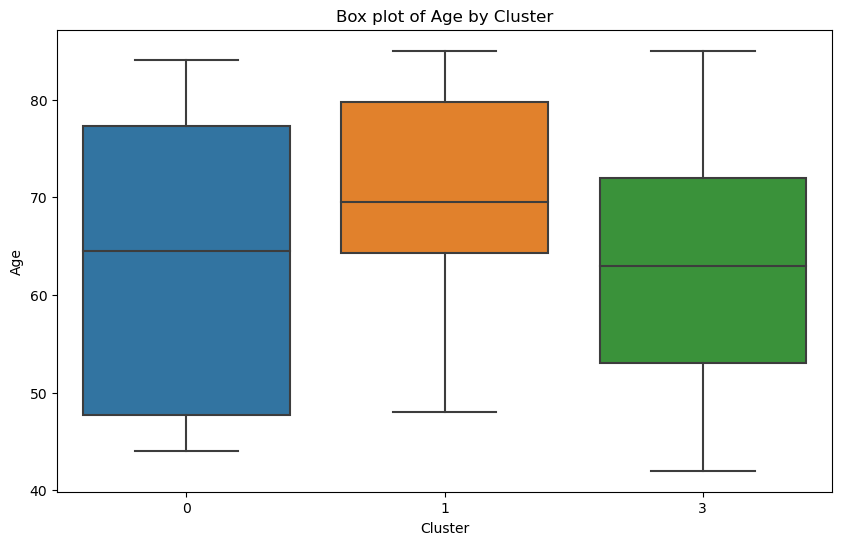

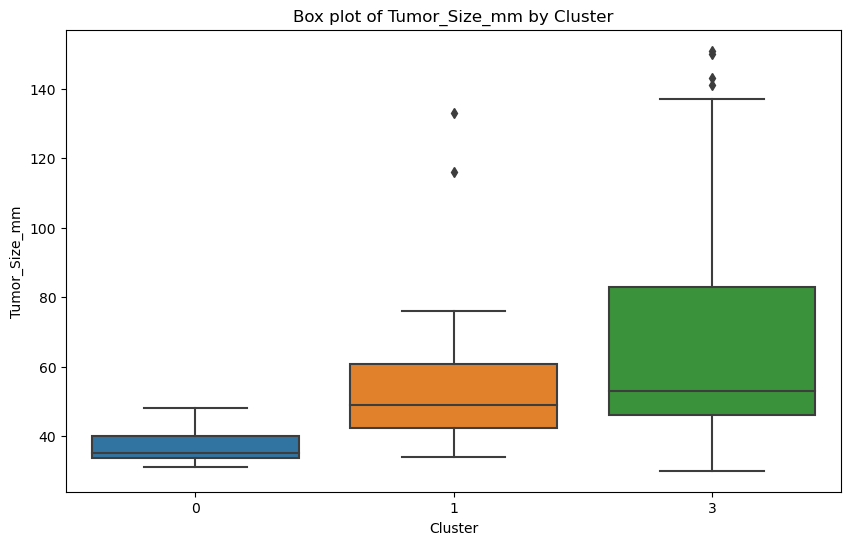

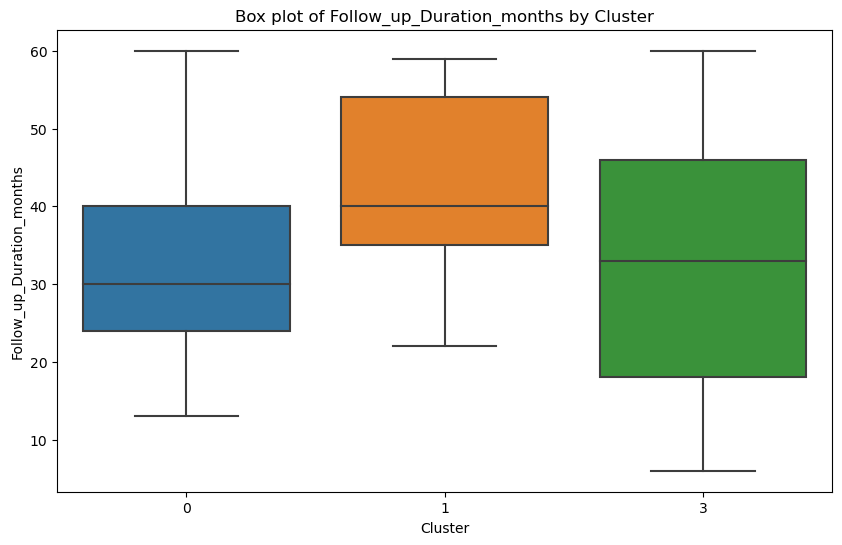

In [80]:
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=var, data=cluster_combined)
    plt.title(f'Box plot of {var} by Cluster')
    plt.show()


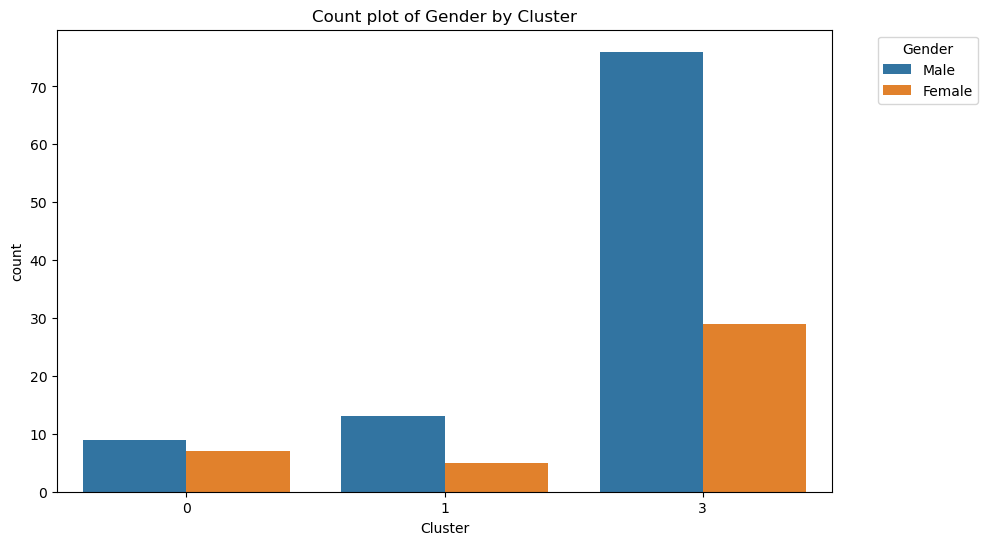

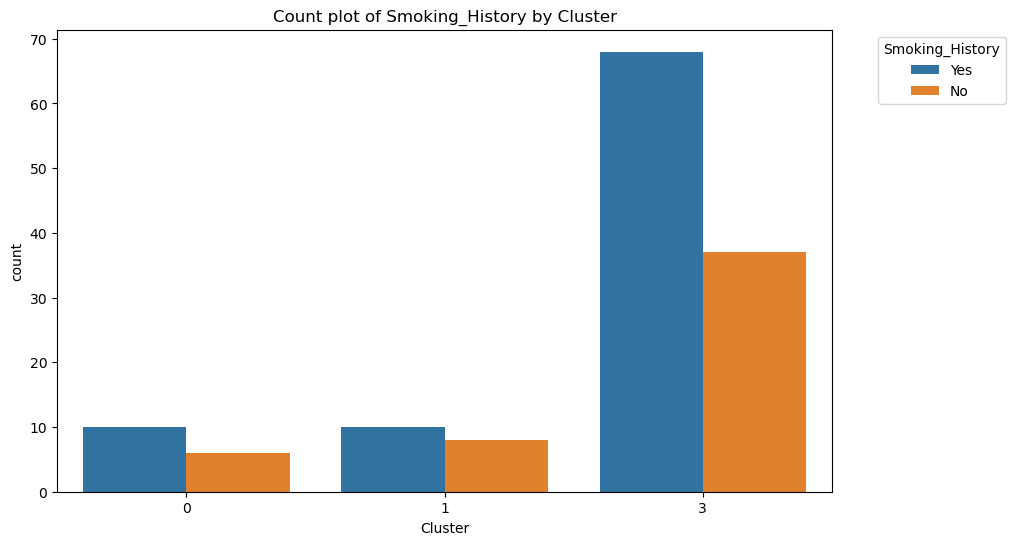

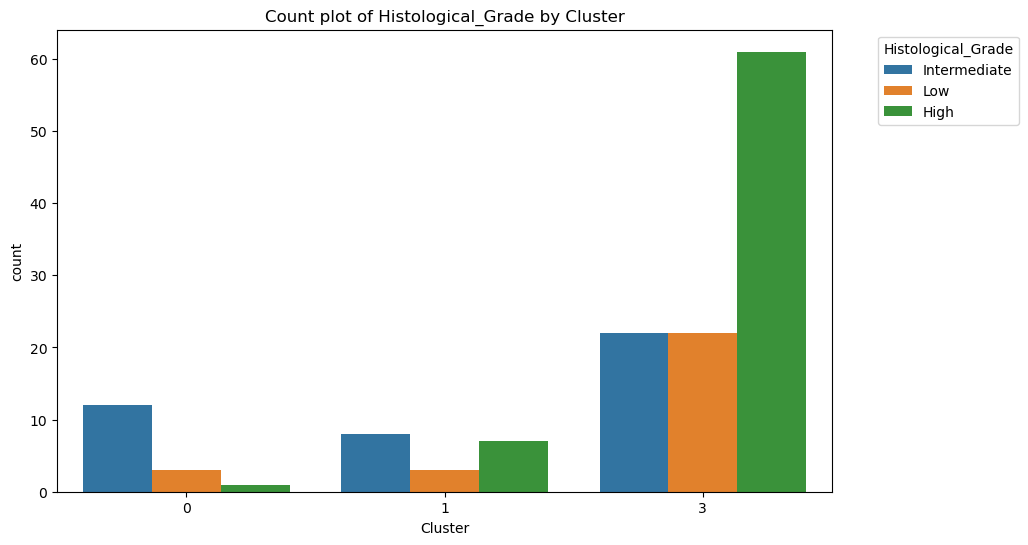

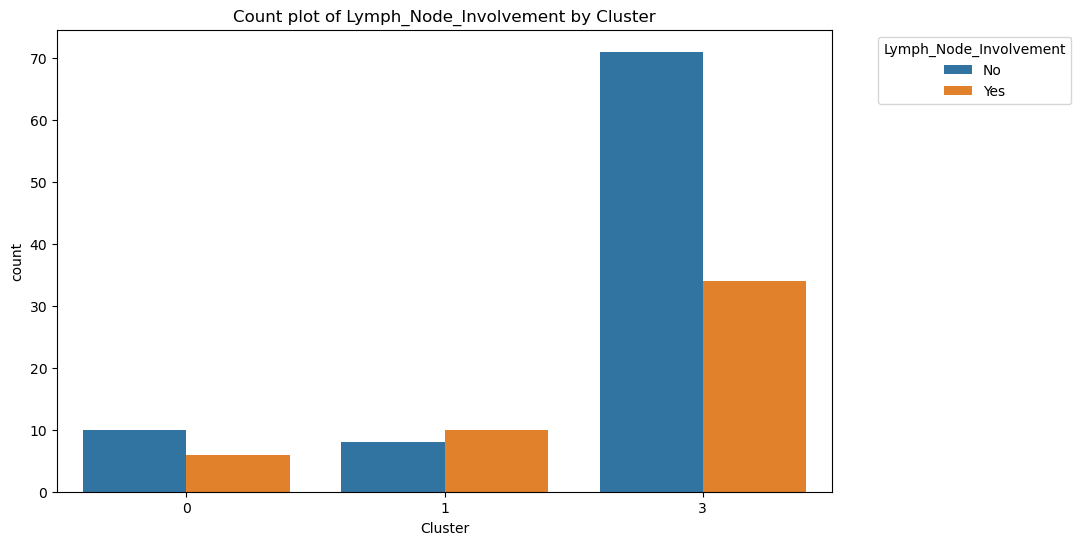

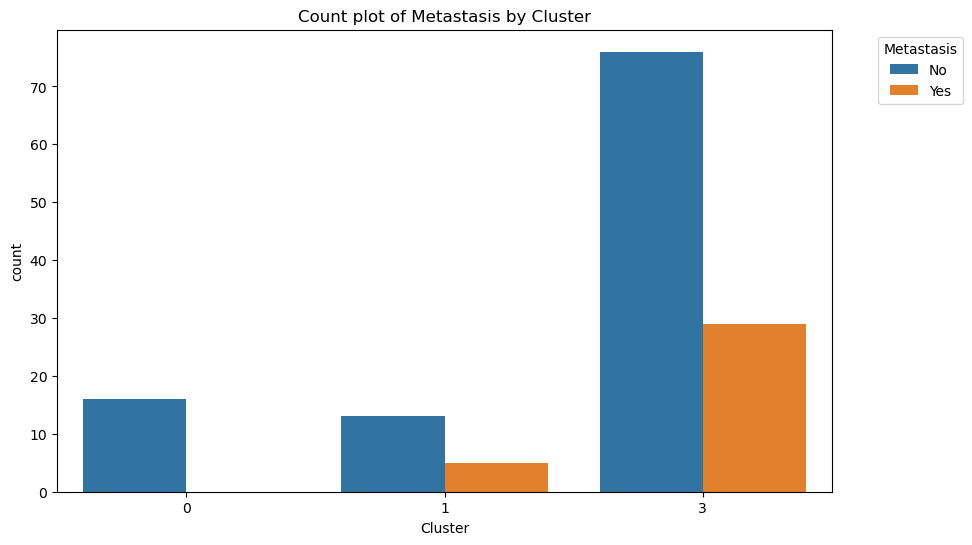

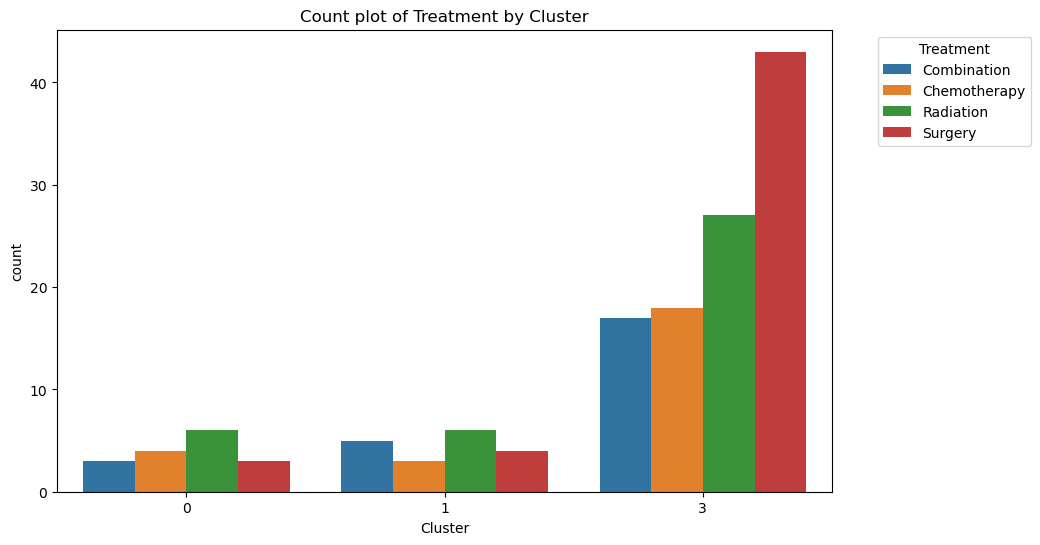

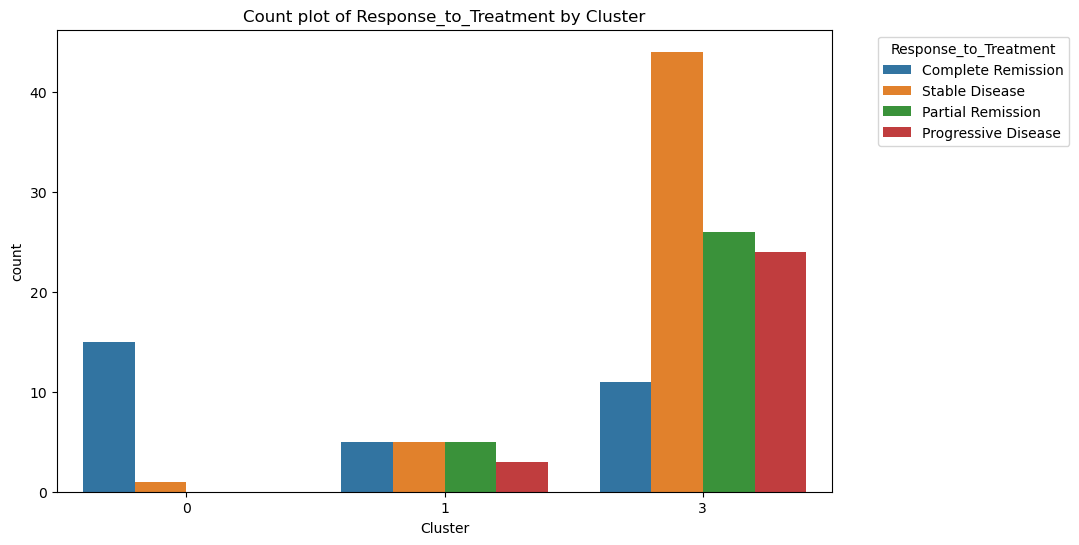

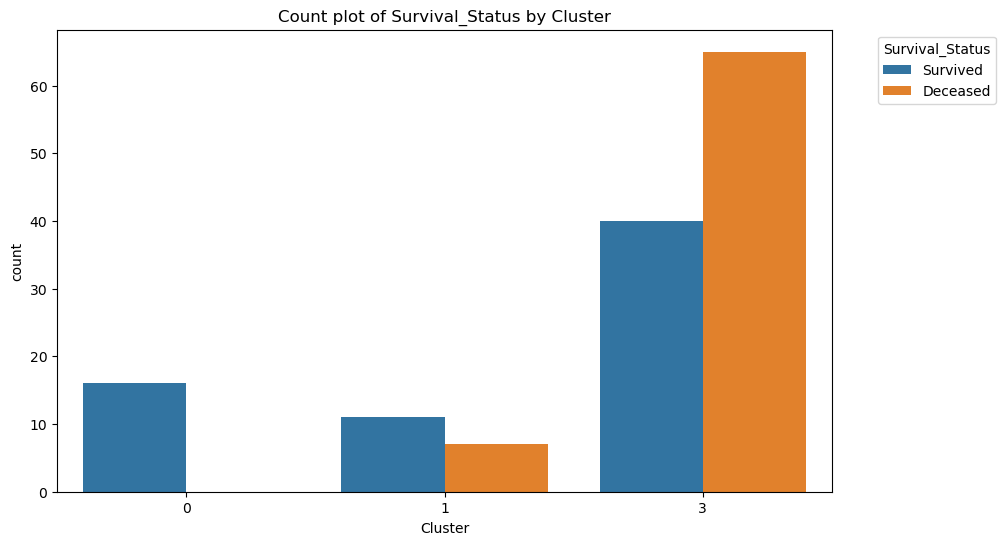

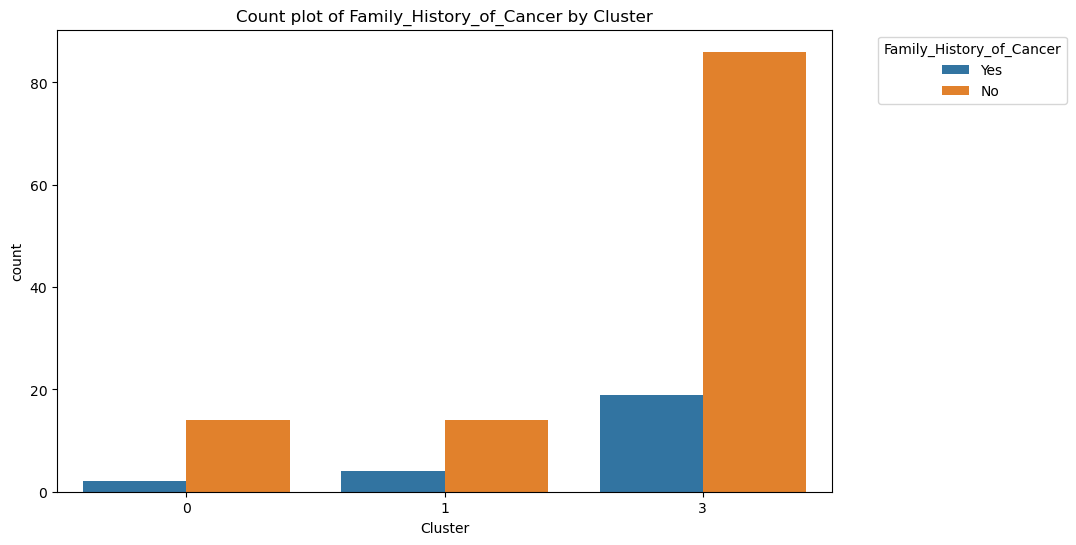

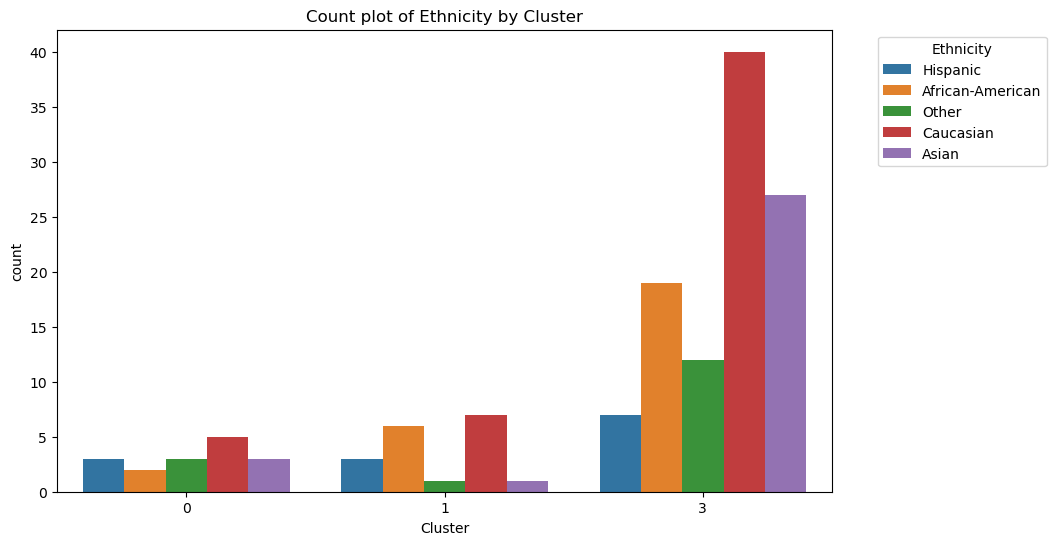

In [81]:
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', hue=var, data=cluster_combined)
    plt.title(f'Count plot of {var} by Cluster')
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

